# 4) Get Dividing Infrastructure 

## Env

In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import os

### Mk SQL Connection

### Load from pickle


In [2]:
import pickle
# Load definitions

# Load 
with open('../data/temp/projections', 'rb') as fp:
    PROJ = pickle.load(fp)

# Load Definitions
with open('../data/temp/geo_definitions', 'rb') as fp:
    GEO_DEFINITIONS = pickle.load(fp)

## Get Hwys and Bridges

### First Load from Pickle

In [4]:
bridges = {}
hwys = {}
coastlines = {}

for m in GEO_DEFINITIONS.keys():
    print(f'{m}..')
    with open(f'../data/temp/osm_bridges_{m}', 'rb') as f:
        bridges[m] = pickle.load(f)

    with open(f'../data/temp/osm_hwys_{m}', 'rb') as f:
        hwys[m] = pickle.load(f)
    
    with open(f'../data/temp/osm_coastlines_{m}', 'rb') as f:
        coastlines[m] = pickle.load(f)


phi..
chi..
sf..
sfba..
eastbay..
nyc..


### Bridges
`bridge in ['yes','viaduct']`

In [1]:
#ox.features_from_place(GEO_DEFINITIONS['phi'], tags={'railway': 'rail', 'bridge': 'yes'}).groupby(['railway', 'bridge']).count()
#G_rail_bridges = ox.features_from_place(GEO_DEFINITIONS['phi'], tags={'railway': 'rail'}).groupby('bridge').count()
#phi_feats = ox.features_from_place(GEO_DEFINITIONS['phi'], tags={'bridge':['yes'})
#phi_feats.groupby(['element','highway']).count()
#phi_feats.plot()

bridges = {}
for m in GEO_DEFINITIONS.keys():
    print(f'{m}..')
    try:
        bridges[m] = ox.features_from_place(GEO_DEFINITIONS[m], tags={'bridge':['yes','viaduct']})
        with open(f'../data/temp/osm_bridges_{m}', 'wb') as fp:
            pickle.dump(bridges[m], fp)
        print(f'\tSuccess!')
    except Exception as e:
        print(f'\tError: {e}')

NameError: name 'GEO_DEFINITIONS' is not defined

### Highways
`highway in ['motorway','motorway_link']`
`highway in ['motorway','motorway_link', 'motorway_junction']`

In [44]:
# Highways
HWY_DEFINITION = ['motorway','motorway_link','motorway_junctions']
#hwys = {}
for m in GEO_DEFINITIONS.keys():
    print(f'{m}..')
    try:
        hwys[m] = ox.features_from_place(GEO_DEFINITIONS[m], tags={'highway':HWY_DEFINITION})
        with open(f'../data/temp/osm_hwys_{m}', 'wb') as fp:
            pickle.dump(hwys[m], fp)
        print(f'\tSuccess!')
    except Exception as e:
        print(f'\tError: {e}')
    

phi..
	Success!
chi..
	Success!
sf..
	Success!
sfba..
	Success!
eastbay..
	Success!
nyc..
	Success!


### Coastlines

In [89]:
# Coastlines
coastlines = {}
for m in GEO_DEFINITIONS.keys():
    print(f'{m}..')
    try:
        coastlines[m] = eo_
        with open(f'../data/temp/osm_coastlines_{m}', 'wb') as fp:
            pickle.dump(coastlines[m], fp)
        print(f'\tSuccess!')
    except Exception as e:
        print(f'\tError: {e}')
    

phi..
	Error: No matching features. Check query location, tags, and log.
chi..
	Error: No matching features. Check query location, tags, and log.
sf..
	Success!
sfba..
	Success!
eastbay..
	Success!
nyc..
	Success!


### Fences/Barriers


In [91]:
water = {}
for m in GEO_DEFINITIONS.keys():
    print(f'{m}..')
    try:
        water[m] = ox.features_from_place(GEO_DEFINITIONS[m], tags={'natural':'water'})
        print(f'\tSuccess!')
    except Exception as e:
        print(f'\tError: {e}')

phi..
	Success!
chi..
	Success!
sf..
	Success!
sfba..
	Success!
eastbay..
	Success!
nyc..
	Success!


<Axes: >

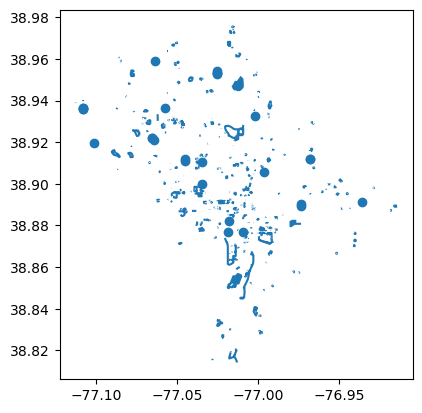

In [80]:
#ox.features_from_place('Washington, DC', tags={'barrier':['fence','wall','ditch','yes']}).plot()
#ox.features_from_place('Washington, DC', tags={'barrier':['fence','wall','ditch','yes']}).plot()
ox.features_from_place('Washington, DC', tags={'obstacle':['fence','wall','ditch','yes']}).plot()

In [92]:
#!pip install ipyleaflet
#from ipyleaflet import Map, basemaps
#!pip install keplergl
from keplergl import KeplerGl
map_1 = KeplerGl()
#map_1.add_data(hwys['sfba'][hwys['sfba'].is_valid].reset_index().set_index('id').drop('buffer10', axis=1))
#map_1.add_data(hwys['sfba'][hwys['sfba'].is_valid].reset_index().set_index('id').drop('buffer10', axis=1).to_json(allow_nan=False))
map_1.add_data(hwys['sfba'], name = 'hwys')
map_1.add_data(bridges['sfba'], name='bridges')
map_1.add_data(coastlines['sfba'], name='coast')
map_1.add_data(water['sfba'], name='water')
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
/Users/jon/anaco

KeplerGl(data={'hwys': {'index': [('way', 4311275), ('way', 4336093), ('way', 4352168), ('way', 4370022), ('wa…

## Pipeline

### Get Bounds

In [81]:
GEO_DEFINITIONS

{'phi': [{'county': 'Philadelphia', 'state': 'Pennsylvania'}],
 'chi': [{'county': 'Cook', 'state': 'Illinois'}],
 'sf': [{'county': 'San Francisco', 'state': 'California'}],
 'sfba': [{'county': 'San Francisco', 'state': 'California'},
  {'county': 'Contra Costa', 'state': 'California'},
  {'county': 'Alameda', 'state': 'California'},
  {'county': 'San Mateo', 'state': 'California'},
  {'county': 'Santa Clara', 'state': 'California'}],
 'eastbay': [{'county': 'Contra Costa', 'state': 'California'},
  {'county': 'Alameda', 'state': 'California'}],
 'nyc': [{'county': 'King', 'state': 'New York'},
  {'county': 'Queens', 'state': 'New York'},
  {'county': 'New York', 'state': 'New York'},
  {'county': 'Bronx', 'state': 'New York'}]}

In [82]:
bounds = {}

for metro in ['phi','nyc','chi','sfba','sf','eastbay']:
    print(f'Loading {metro}..')
    try: 
        bounds[metro] = ox.geocoder.geocode_to_gdf(GEO_DEFINITIONS[metro]).dissolve()
        print('\tSuccess!')
    except Exception as e:
        print(f'\t{e}')


Loading phi..
	Success!
Loading nyc..
	Success!
Loading chi..
	Success!
Loading sfba..
	Success!
Loading sf..
	Success!
Loading eastbay..
	Success!


In [161]:
GEO_DEFINITIONS

{'phi': [{'county': 'Philadelphia', 'state': 'Pennsylvania'}],
 'chi': [{'county': 'Cook', 'state': 'Illinois'}],
 'sf': [{'county': 'San Francisco', 'state': 'California'}],
 'sfba': [{'county': 'San Francisco', 'state': 'California'},
  {'county': 'Contra Costa', 'state': 'California'},
  {'county': 'Alameda', 'state': 'California'},
  {'county': 'San Mateo', 'state': 'California'},
  {'county': 'Santa Clara', 'state': 'California'}],
 'eastbay': [{'county': 'Contra Costa', 'state': 'California'},
  {'county': 'Alameda', 'state': 'California'}],
 'nyc': [{'county': 'King', 'state': 'New York'},
  {'county': 'Queens', 'state': 'New York'},
  {'county': 'New York', 'state': 'New York'},
  {'county': 'Bronx', 'state': 'New York'}]}

### Project

In [94]:
# Pipeline Process
zones = {}

for m in ['phi','nyc','chi','sfba', 'sf','eastbay']:
    print(f'{m}...')
    # Union all together
    if m in coastlines.keys():
        temp = pd.concat([hwys[m], bridges[m], coastlines[m], water[m]], axis = 0)
    else:
        temp = pd.concat([hwys[m], bridges[m], water[m]], axis = 0)
    # - PROJECT to crs
    # - BUFFER (10m)
    temp['buffer10'] = temp.to_crs(PROJ[m]).buffer(10)
    temp = temp.set_geometry('buffer10')
    # - DISSOLVE into a singular geospatial object
    temp = temp.dissolve()
    # - DIFFERENCE between extents 
    # - MULTIPART_TO_SINGLEPARTS (explode)
    temp2 = bounds[m].to_crs(PROJ[m]).difference(temp).explode()
    # - CLIP by water and other boundaries (definitely necessary in NYC, unsure where else)
    zones[m] = temp2    

phi...


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


nyc...


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


chi...


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


sfba...


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


sf...


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


eastbay...


/Users/jon/anaconda3/envs/cyp204d/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


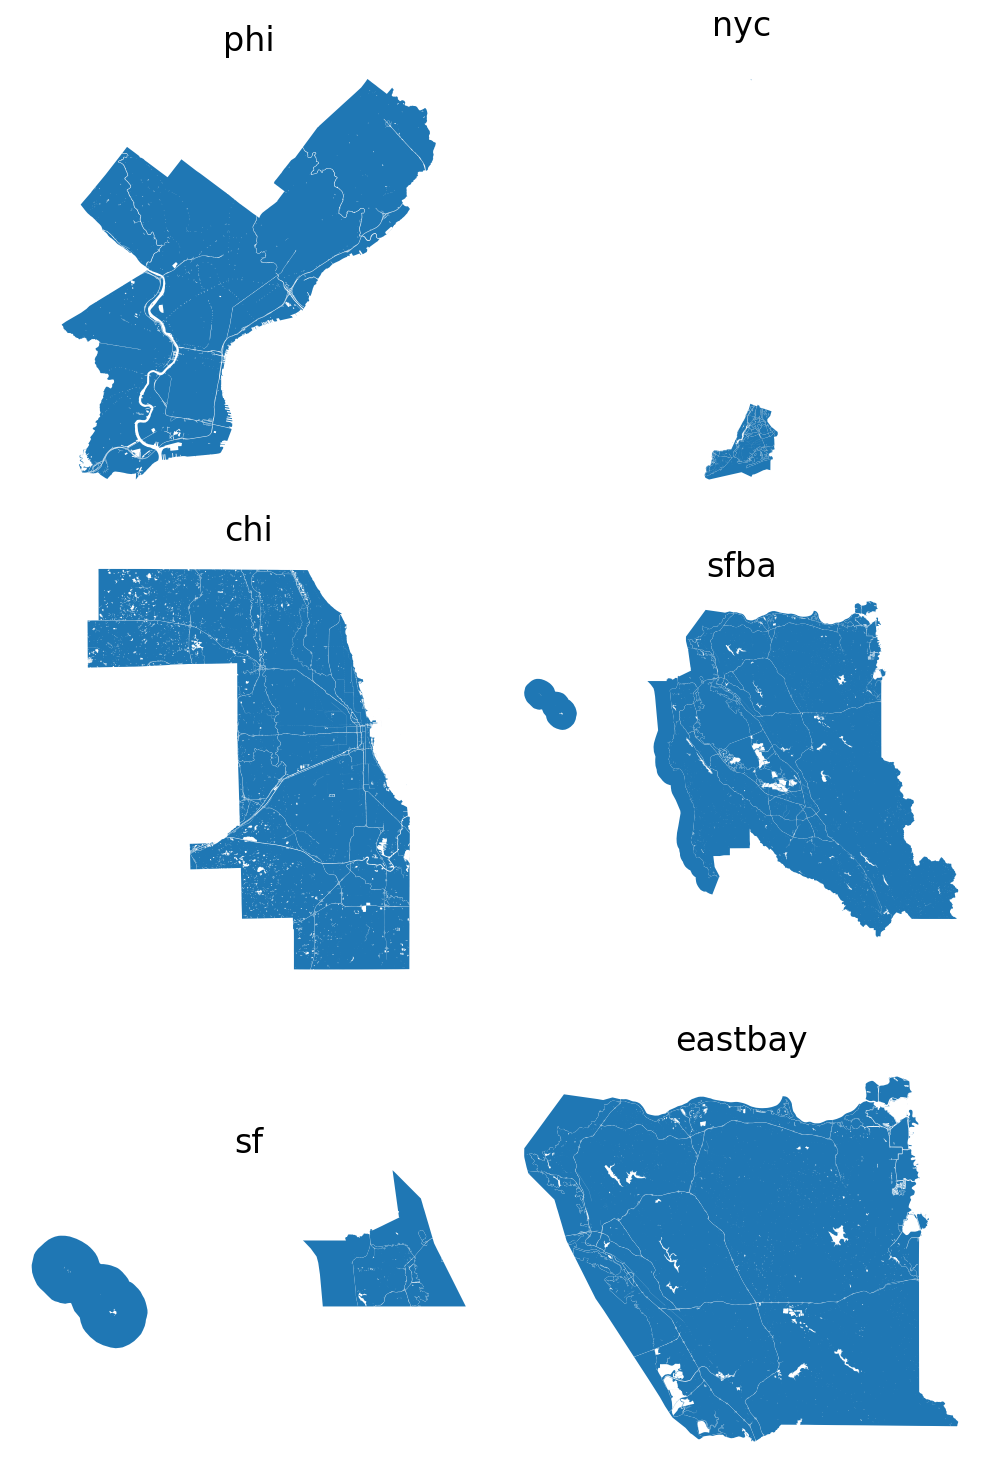

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(10,15))

axes = axes.flatten()

#for i, ax in enumerate(zip(ax, 
for i in zip(axes, zones.keys()):
    ax = i[0]
    m = i[1]
    
    zones[m].plot(ax=ax)
    ax.set_title(m, size = 24)
    ax.set_axis_off()

plt.tight_layout()
plt.show()
    

In [98]:
for i in zones.keys():
    print(f'{i}..')
    try:
        zones[i].to_file(f'../data/exported_zone_maps/{i}.shp')
        with open(f'../data/temp/zones_{i}','wb') as fp:
            pickle.dump(zones[i], fp)
        print(f'\tSuccess!')
    except Exception as e:
        print(f'\t{e}')

phi..
	Success!
nyc..
	Success!
chi..
	Success!
sfba..
	Success!
sf..
	Success!
eastbay..
	Success!


0    POLYGON ((-8260623.493 4935916.821, -8262726.1...
0    POLYGON ((-8265442.992 4944662.278, -8265503.9...
0    POLYGON ((-8259636.189 4958752.013, -8259606.6...
0    POLYGON ((-8259488.435 4959046.865, -8258952.2...
0    POLYGON ((-8255262.998 4959939.95, -8255255.35...
                           ...                        
0    POLYGON ((-8209664.845 4961020.379, -8209665.4...
0    POLYGON ((-8209758.74 4960983.7, -8209743.411 ...
0    POLYGON ((-8210094.598 4961198.238, -8210093.8...
0    POLYGON ((-8210215.489 4961306.929, -8210134.9...
0    POLYGON ((-8210264.07 4961210.488, -8210274.23...
Length: 1683, dtype: geometry